In [17]:
%%capture

# Install requirements
!pip install photutils[all] ;

import requests;
url = 'https://drive.google.com/uc?id=17wZCqWSwADyTLr9UuKDq7O62pZ5zmRtx' ;

with requests.get(url, allow_redirects=True) as r :
  with open('sample.jpeg', 'wb') as f:
      f.write(r.content)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#picture
fname = 'sample.jpeg'

#convert to black n white
image = Image.open(fname).convert('L')
image = np.array(image, dtype=np.float64)

image -= np.median(image)
print(image)

[[-53. -53. -53. ... -47. -47. -47.]
 [-53. -53. -53. ... -47. -47. -47.]
 [-53. -53. -53. ... -46. -46. -46.]
 ...
 [ -2.  -2.  -1. ...  72.  72.  72.]
 [ -2.  -2.  -1. ...  72.  72.  72.]
 [ -2.  -2.  -1. ...  72.  72.  72.]]


In [19]:

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image)  
daofind = DAOStarFinder(fwhm=4.0, threshold=3.0 * bkg_sigma)  
sources = daofind(image)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid  ycentroid   sharpness  ... sky peak    flux       mag     
--- --------- ------------ ---------- ... --- ---- --------- ------------
  1 462.12358 -0.091388008 0.53733274 ...   0   80 1.7389734  -0.60073232
  2  710.0094    3.5763492 0.44926335 ...   0  162 2.9845747   -1.1872061
  3 1683.1983     6.575875 0.43962797 ...   0   40 1.3029075  -0.28728397
  4 1229.8986    10.819236 0.59568704 ...   0  162 2.6176063   -1.0447608
  5 1333.0792    11.286655 0.54750236 ...   0   54 1.3614634  -0.33501489
  6 397.19263    12.240226 0.49042513 ...   0   57  1.506151  -0.44467128
  7 1617.9246    12.511076 0.47505144 ...   0  148 2.6418976     -1.05479
  8 944.65968    12.937815 0.45134502 ...   0   59 1.6023783  -0.51191266
  9 509.56798    13.779949 0.54313492 ...   0  112 2.2210689  -0.86640509
 10 1893.6117    15.608736 0.44000036 ...   0   76 1.8223076  -0.65155421
...       ...          ...        ... ... ...  ...       ...          ...
459 1186.5869    1409.9467  0.5057137 

In [20]:
from photutils.aperture import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=4.0)  
phot_table = aperture_photometry(image, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter    ycenter    aperture_sum
       pix        pix                  
--- --------- ------------ ------------
  1 462.12358 -0.091388008   -735.88649
  2  710.0094    3.5763492   -496.26906
  3 1683.1983     6.575875    -1572.068
  4 1229.8986    10.819236   -943.88484
  5 1333.0792    11.286655   -1454.2068
  6 397.19263    12.240226   -1762.7587
  7 1617.9246    12.511076   -735.06966
  8 944.65968    12.937815    -1350.009
  9 509.56798    13.779949   -1463.7137
 10 1893.6117    15.608736   -1423.3983
...       ...          ...          ...
460 65.682138    1423.0616    699.15412
461  1353.736    1424.6204    3583.6722
462 1239.0129    1440.3651    3198.6912
463 1643.3647    1449.1595    3879.0402
464 787.09415    1456.7231    2107.4515
465 584.47539    1464.3208    1463.4605
466 194.50785    1464.8352    1281.4772
467 282.50532    1483.8256    1066.7998
468 952.96451    1488.1586    2442.6389
469 170.31398    1505.4292    1687.9407
Length = 469 rows


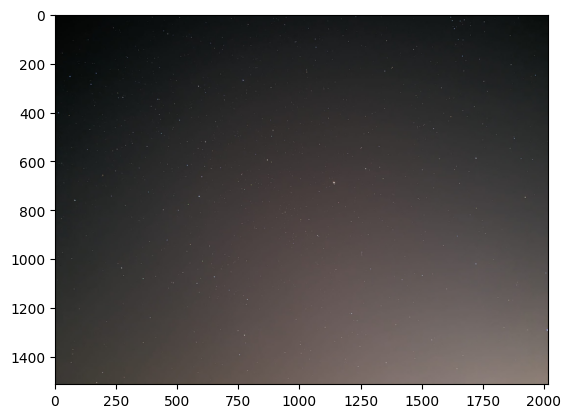

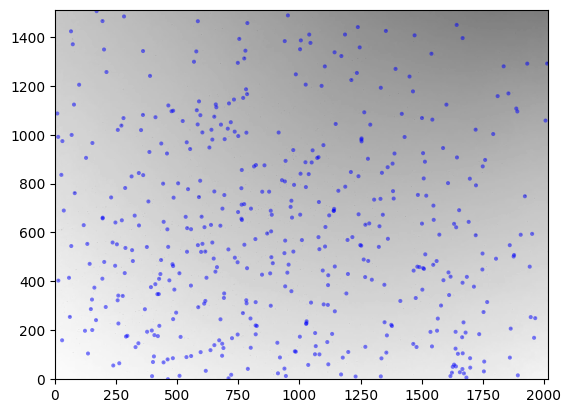

In [21]:
#original image
plt.imshow(Image.open(fname))
plt.show()

#processed image
plt.imshow(image, cmap='gray_r', origin='lower')
_ = apertures.plot(color='blue', lw=1.5, alpha=0.5)